#Tarefa 4 - Regras de associação

Neste exercício, você deve aplicar regras de associação para analisar um dataset utilizando o algoritmo Apriori. A ideia é identificar padrões frequentes de co-ocorrência entre os itens e extrair regras que possam ser úteis para insights de negócios.

---

## **Dicas:**

- Tutorial para iniciantes em Python: https://www.datacamp.com/cheat-sheet/getting-started-with-python-cheat-sheet

- Documentação do pandas: https://colab.research.google.com/drive/1a4sbKG7jOJGn4oeonQPA8XjJm7OYgcdX

- Documentação do scikit-learn: https://scikit-learn.org/stable/

- Documentação do matplotlib: https://matplotlib.org/stable/index.html

- Documentação do seaborn: https://seaborn.pydata.org/tutorial.html

## **Dataset:**

O conjunto de dados contém 38.765 linhas com os pedidos de compra de pessoas em supermercados. Esses pedidos podem ser analisados, e regras de associação podem ser geradas utilizando a Análise de Cesta de Compras por meio de algoritmos como o Algoritmo Apriori.

**Colunas:**

1. **Member_number** → Id do cliente
2. **Date** → Data da compra
3. **itemDescription** → Item comprado

## **Importe os pacotes**

In [48]:
import pandas as pd
import mlxtend.preprocessing as mlpre
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt

## **Crie os datasets**
### **Crie um DataFrame a partir do arquivo de dados disponibilizados no EaD**

**Dicas:**

* Certifique-se que os arquivos a serem lidos estão carregados na sua sessão do Colab, ou em um drive previamente montado, e ajuste o comando para incluir todo o caminho até cada um dos arquivos a serem lidos.
* Se clicar com o botão direito do mouse no arquivo que deseja ser carregado que está ali nas esquerda (após upload) você pode clicar na opção de "copy path" que vai já pegar o caminho necessário para inserir no comando. Para inserir só pressionar "cntrl + C"

In [43]:
df = pd.read_csv("Groceries_dataset.csv")
print(df.head())

df.describe()

   Member_number        Date   itemDescription
0           1808  21-07-2015    tropical fruit
1           2552  05-01-2015        whole milk
2           2300  19-09-2015         pip fruit
3           1187  12-12-2015  other vegetables
4           3037  01-02-2015        whole milk


,Member_number
count,38765.000000
mean,3003.641868
std,1153.611031
min,1000.000000
25%,2002.000000
50%,3005.000000
75%,4007.000000
max,5000.000000


# **Transforme as bases de dados**

Para aplicar o algoritmo Apriori, primeiro precisamos transformar o dataset para um formato adequado. No caso de transações com múltiplos itens, vamos converter os dados em um formato de lista de itens por transação. Em seguida, devemos transformar essas listas em uma matriz booleana.

**Dica:**
- Primeiramente agrupe os dados de modo que cada transação contenha uma lista de itens, isso pode ser feito utilizando a função `groupby()`. O resultado disso será um DataFrame com as colunas 'Member_Number' sendo o id do cliente e  'itemDescription' como a lista de todos os itens que ele comprou

Ex:

     Member_number   |     itemDescription
     1004            |   [dessert,salty snack]
- Após agrupar use o `TransactionEncoder()` para transformar as listas de itens em um formato de matriz binária. Ou seja, o resultado disso será um DataFrame em que as linhas continuam como registros de transações mas os itens comprados tornam-se colunas e seus valores variam de True ou False caso durante a transação a pessoa tenha comprado ou não aquele produto.

Ex:

      dessert     |     beef    |    salty snack   |.....
      True        |     False   |         True     |.....

In [44]:
df_grouped = df.groupby('Member_number')['itemDescription'].apply(list).reset_index()
print(df_grouped.head())

transactions = df_grouped['itemDescription'].tolist()

te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_binary = pd.DataFrame(te_ary, columns=te.columns_)
print(df_binary.head())

   Member_number                                    itemDescription
0           1000  [soda, canned beer, sausage, sausage, whole mi...
1           1001  [frankfurter, frankfurter, beef, sausage, whol...
2           1002  [tropical fruit, butter milk, butter, frozen v...
3           1003  [sausage, root vegetables, rolls/buns, deterge...
4           1004  [other vegetables, pip fruit, root vegetables,...
   Instant food products  UHT-milk  abrasive cleaner  artif. sweetener  \
0                  False     False             False             False   
1                  False     False             False             False   
2                  False     False             False             False   
3                  False     False             False             False   
4                  False     False             False             False   

   baby cosmetics   bags  baking powder  bathroom cleaner   beef  berries  \
0           False  False          False             False  False    Fa

### **Encontre os itemsets mais frequentes**

Agora com a base de dados transformada para o formato adequado, utilize o algoritmo apriori para encontrar as combinações de produtos mais frequentes de serem compradas.


Para começar, você pode definir um suporte mínimo de 6% (se quiser, varie esse valor para visualizar os efeitos)

**Dica:**

- Busque pela função `apriori()` da biblioteca `mlxtend`

In [45]:
frequent_itemsets = apriori(df_binary, min_support=0.06, use_colnames=True)

print(frequent_itemsets.head())

    support        itemsets
0  0.078502      (UHT-milk)
1  0.119548          (beef)
2  0.079785       (berries)
3  0.062083     (beverages)
4  0.158799  (bottled beer)


#**Gere e visualize as regras de associação**

Para gerar e visualizar as regras de associação, comece definindo uma confiança mínima de 50%. Se desejar, você pode ajustar esse valor para observar como ele afeta os resultados. Após a geração das regras, organize-as em ordem decrescente de confiança para facilitar a visualização.

**Dica:**

- Busque pela função `association_rules()` da biblioteca `mlxtend`

In [46]:
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)

rules_sorted = rules.sort_values(by="confidence", ascending=False)

print(rules_sorted.head())

                       antecedents   consequents  antecedent support  \
20      (yogurt, other vegetables)  (whole milk)            0.120318   
22            (rolls/buns, yogurt)  (whole milk)            0.111339   
18  (rolls/buns, other vegetables)  (whole milk)            0.146742   
19        (soda, other vegetables)  (whole milk)            0.124166   
21              (rolls/buns, soda)  (whole milk)            0.119805   

    consequent support   support  confidence      lift  leverage  conviction  \
20            0.458184  0.071832    0.597015  1.303003  0.016704    1.344507   
22            0.458184  0.065931    0.592166  1.292420  0.014917    1.328521   
18            0.458184  0.082093    0.559441  1.220996  0.014859    1.229837   
19            0.458184  0.069266    0.557851  1.217528  0.012375    1.225416   
21            0.458184  0.065162    0.543897  1.187072  0.010269    1.187926   

    zhangs_metric  
20       0.264348  
22       0.254605  
18       0.212124  
19    

### **Descreva a regra gerada com o maior valor de confiança**

A regra "Se outros vegetais e iogurte são comprados, então leite integral também será comprado" tem uma confiança de 59.7%, o que significa que em cerca de 60% das vezes que "outros vegetais e iogurte" são comprados, o cliente também compra "leite integral". O lift de 1.30 sugere que essa combinação de itens tem uma probabilidade de compra conjunta 30% maior do que a compra de "leite integral" sozinho. Essa regra é útil para estratégias de marketing, como promoções de vendas cruzadas.

### **Qual o suporte e a confiança desta regra?**

*   **Suporte:** 0.071832
*   **Confiança:** 0.597015




# **Filtrar Regras Relevantes**

A partir do DataFrame gerado com as regras de associação, selecione as regras com valores de confiança superiores a 55%.

In [47]:
rules_55 = rules[rules['confidence'] > 0.55]

rules_55_sorted = rules_55.sort_values(by='confidence', ascending=False)

print(rules_55_sorted)

                       antecedents   consequents  antecedent support  \
20      (yogurt, other vegetables)  (whole milk)            0.120318   
22            (rolls/buns, yogurt)  (whole milk)            0.111339   
18  (rolls/buns, other vegetables)  (whole milk)            0.146742   
19        (soda, other vegetables)  (whole milk)            0.124166   

    consequent support   support  confidence      lift  leverage  conviction  \
20            0.458184  0.071832    0.597015  1.303003  0.016704    1.344507   
22            0.458184  0.065931    0.592166  1.292420  0.014917    1.328521   
18            0.458184  0.082093    0.559441  1.220996  0.014859    1.229837   
19            0.458184  0.069266    0.557851  1.217528  0.012375    1.225416   

    zhangs_metric  
20       0.264348  
22       0.254605  
18       0.212124  
19       0.203992  


# **Analise as regras de associação**

Plote  um gráfico para analisar as regras de associação.

Para analisar as regras de associação, considere a **confiança**, o **suporte** e a **elevação (lift)**.

**Dica:**

- Uma abordagem eficaz é utilizar um gráfico de dispersão (`plt.scatter()`)
- Escolha duas dessas variáveis para representar os eixos x e y, e use a terceira variável para determinar a escala de cor dos pontos




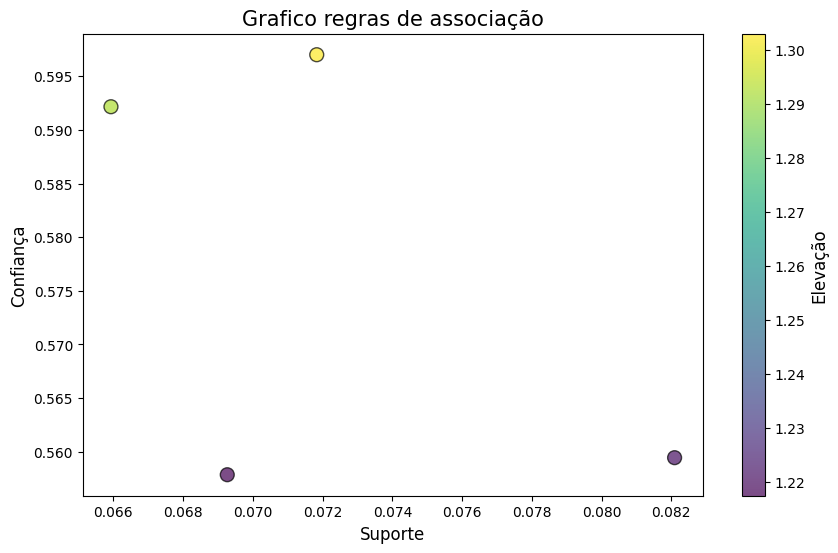

In [50]:
# Scatter plot using support (x), confidence (y), and lift (color scale)

plt.figure(figsize=(10,6))
scatter = plt.scatter(rules_55['support'], rules_55['confidence'], c=rules_55['lift'], cmap='viridis', s=100, edgecolor='k', alpha=0.7)
plt.title('Grafico regras de associação', fontsize=15)
plt.xlabel('Suporte', fontsize=12)
plt.ylabel('Confiança', fontsize=12)
colorbar = plt.colorbar(scatter)
colorbar.set_label('Elevação', fontsize=12)
plt.show()


# **Cenário**

Imagine o seguinte cenário: o gerente de um supermercado deseja aumentar as vendas de "yogurt" (iogurte), que, apesar de ser popular, não é o produto mais comprado. O plano é criar uma promoção que incentive os clientes a adicionar iogurte ao carrinho junto com outros itens que costumam ser comprados junto com ele. Seu objetivo é identificar os itens frequentemente associados ao iogurte para criar uma promoção eficaz.

**Dica:**
- Explore a relação entre os antecedentes (itens comprados antes) e os consequentes (itens que tendem a ser comprados depois)
- Altere a confiança mínima no algoritmo de regras de associação para encontrar as combinações mais fortes relacionadas ao iogurte.


### **Descreva a promoção que o gerente deve implementar para aumentar as vendas de iogurte.**

Responda aqui...